In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from LinearRegression import*
import datetime

# Reading data from excel-sheet

In [2]:
df = pd.read_excel( r'AirQualityUCI.xlsx')

# Analysing the data

In [3]:
df.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], dtype=object)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
df.shape

(9357, 15)

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

# Data Cleaning

In [8]:
df.duplicated().sum()

0

In [9]:
df.replace(-200, np.nan, inplace=True)

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [11]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Since 8443 values of NMHC(GT) are empty so we drop this feature

In [12]:
df=df.drop('NMHC(GT)',axis=1,inplace=False)

# Creating the month and time column as interger values

In [13]:
X=[]
for i in df['Time']:
    i = str(i)
    Hour = (datetime.datetime.strptime(i,'%H:%M:%S')).hour
    X.append(Hour)
X = np.array(X)    
df['Hour']=X.T  
df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date',inplace=True)
df['Month']=df.index.month
df.reset_index(inplace=True)
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,3
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,3
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,3
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,3
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,4
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,4
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,4
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,13,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  Hour           9357 non-null   int32         
 15  Month          9357 n

In [15]:
df.AH.unique()

array([0.75775383, 0.72548745, 0.75023907, ..., 0.64064877, 0.51386592,
       0.50280371])

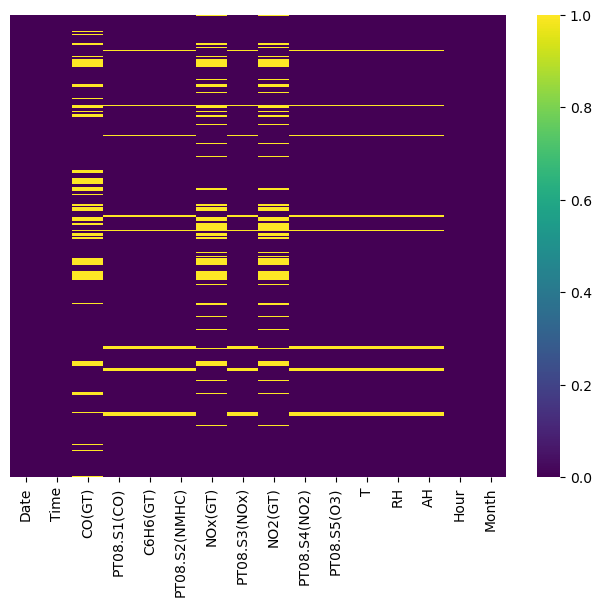

In [16]:
plt.figure(figsize=(8,6))
sb.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap = 'viridis')
plt.show()

# Filled remaining empty cells with mean value of particular column

In [17]:
df['CO(GT)'].fillna(df['CO(GT)'].mean(),inplace=True)
df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].mean(),inplace=True)
df['C6H6(GT)'].fillna(df['C6H6(GT)'].mean(),inplace=True)
df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].mean(),inplace=True)
df['NOx(GT)'].fillna(df['NOx(GT)'].mean(),inplace=True)
df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].mean(),inplace=True)
df['NO2(GT)'].fillna(df['NO2(GT)'].mean(),inplace=True)
df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].mean(),inplace=True)
df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].mean(),inplace=True)
df['T'].fillna(df['T'].mean(),inplace=True)
df['RH'].fillna(df['RH'].mean(),inplace=True)
df['AH'].fillna(df['AH'].mean(),inplace=True)

# Correlational Analysis

In [18]:
df.corr().round(3)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
CO(GT),1.000,0.773,0.812,0.796,0.762,-0.614,0.647,0.558,0.759,0.020,0.043,0.043,0.324,0.103
PT08.S1(CO),0.773,1.000,0.884,0.893,0.616,-0.772,0.563,0.683,0.899,0.049,0.115,0.135,0.321,-0.039
C6H6(GT),0.812,0.884,1.000,0.982,0.617,-0.736,0.536,0.766,0.866,0.199,-0.062,0.168,0.337,0.125
PT08.S2(NMHC),0.796,0.893,0.982,1.000,0.602,-0.797,0.561,0.777,0.881,0.241,-0.090,0.187,0.381,0.125
NOx(GT),0.762,0.616,0.617,0.602,1.000,-0.563,0.763,0.206,0.688,-0.236,0.193,-0.127,0.200,0.130
PT08.S3(NOx),-0.614,-0.772,-0.736,-0.797,-0.563,1.000,-0.570,-0.538,-0.797,-0.145,-0.057,-0.232,-0.317,-0.060
NO2(GT),0.647,0.563,0.536,0.561,0.763,-0.570,1.000,0.141,0.630,-0.165,-0.081,-0.291,0.328,-0.160
PT08.S4(NO2),0.558,0.683,0.766,0.777,0.206,-0.538,0.141,1.000,0.591,0.561,-0.032,0.630,0.217,0.171
PT08.S5(O3),0.759,0.899,0.866,0.881,0.688,-0.797,0.630,0.591,1.000,-0.027,0.125,0.071,0.240,0.048
T,0.020,0.049,0.199,0.241,-0.236,-0.145,-0.165,0.561,-0.027,1.000,-0.579,0.656,0.202,0.275


<AxesSubplot: >

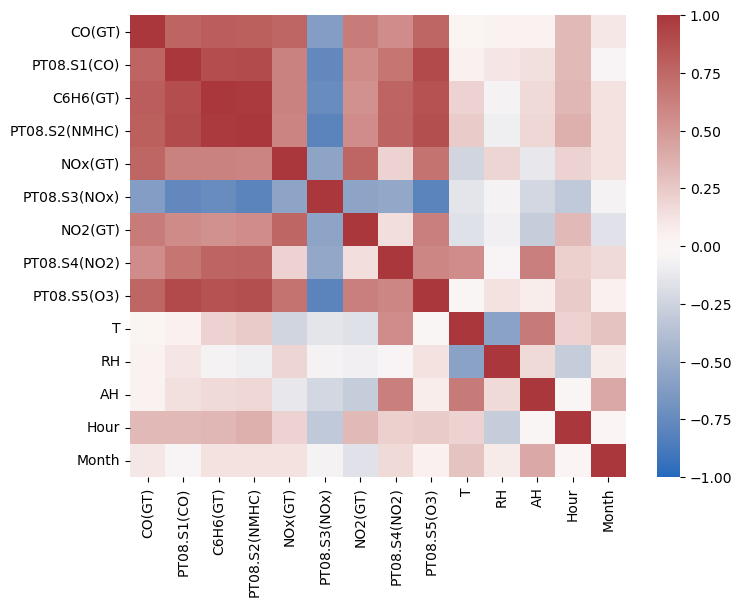

In [19]:
ax= plt.subplots(figsize=(8,6))
sb.heatmap(df.corr().round(3),annot=False,vmin=-1,vmax=1,cmap='vlag')  #heatmap of correlation matrix

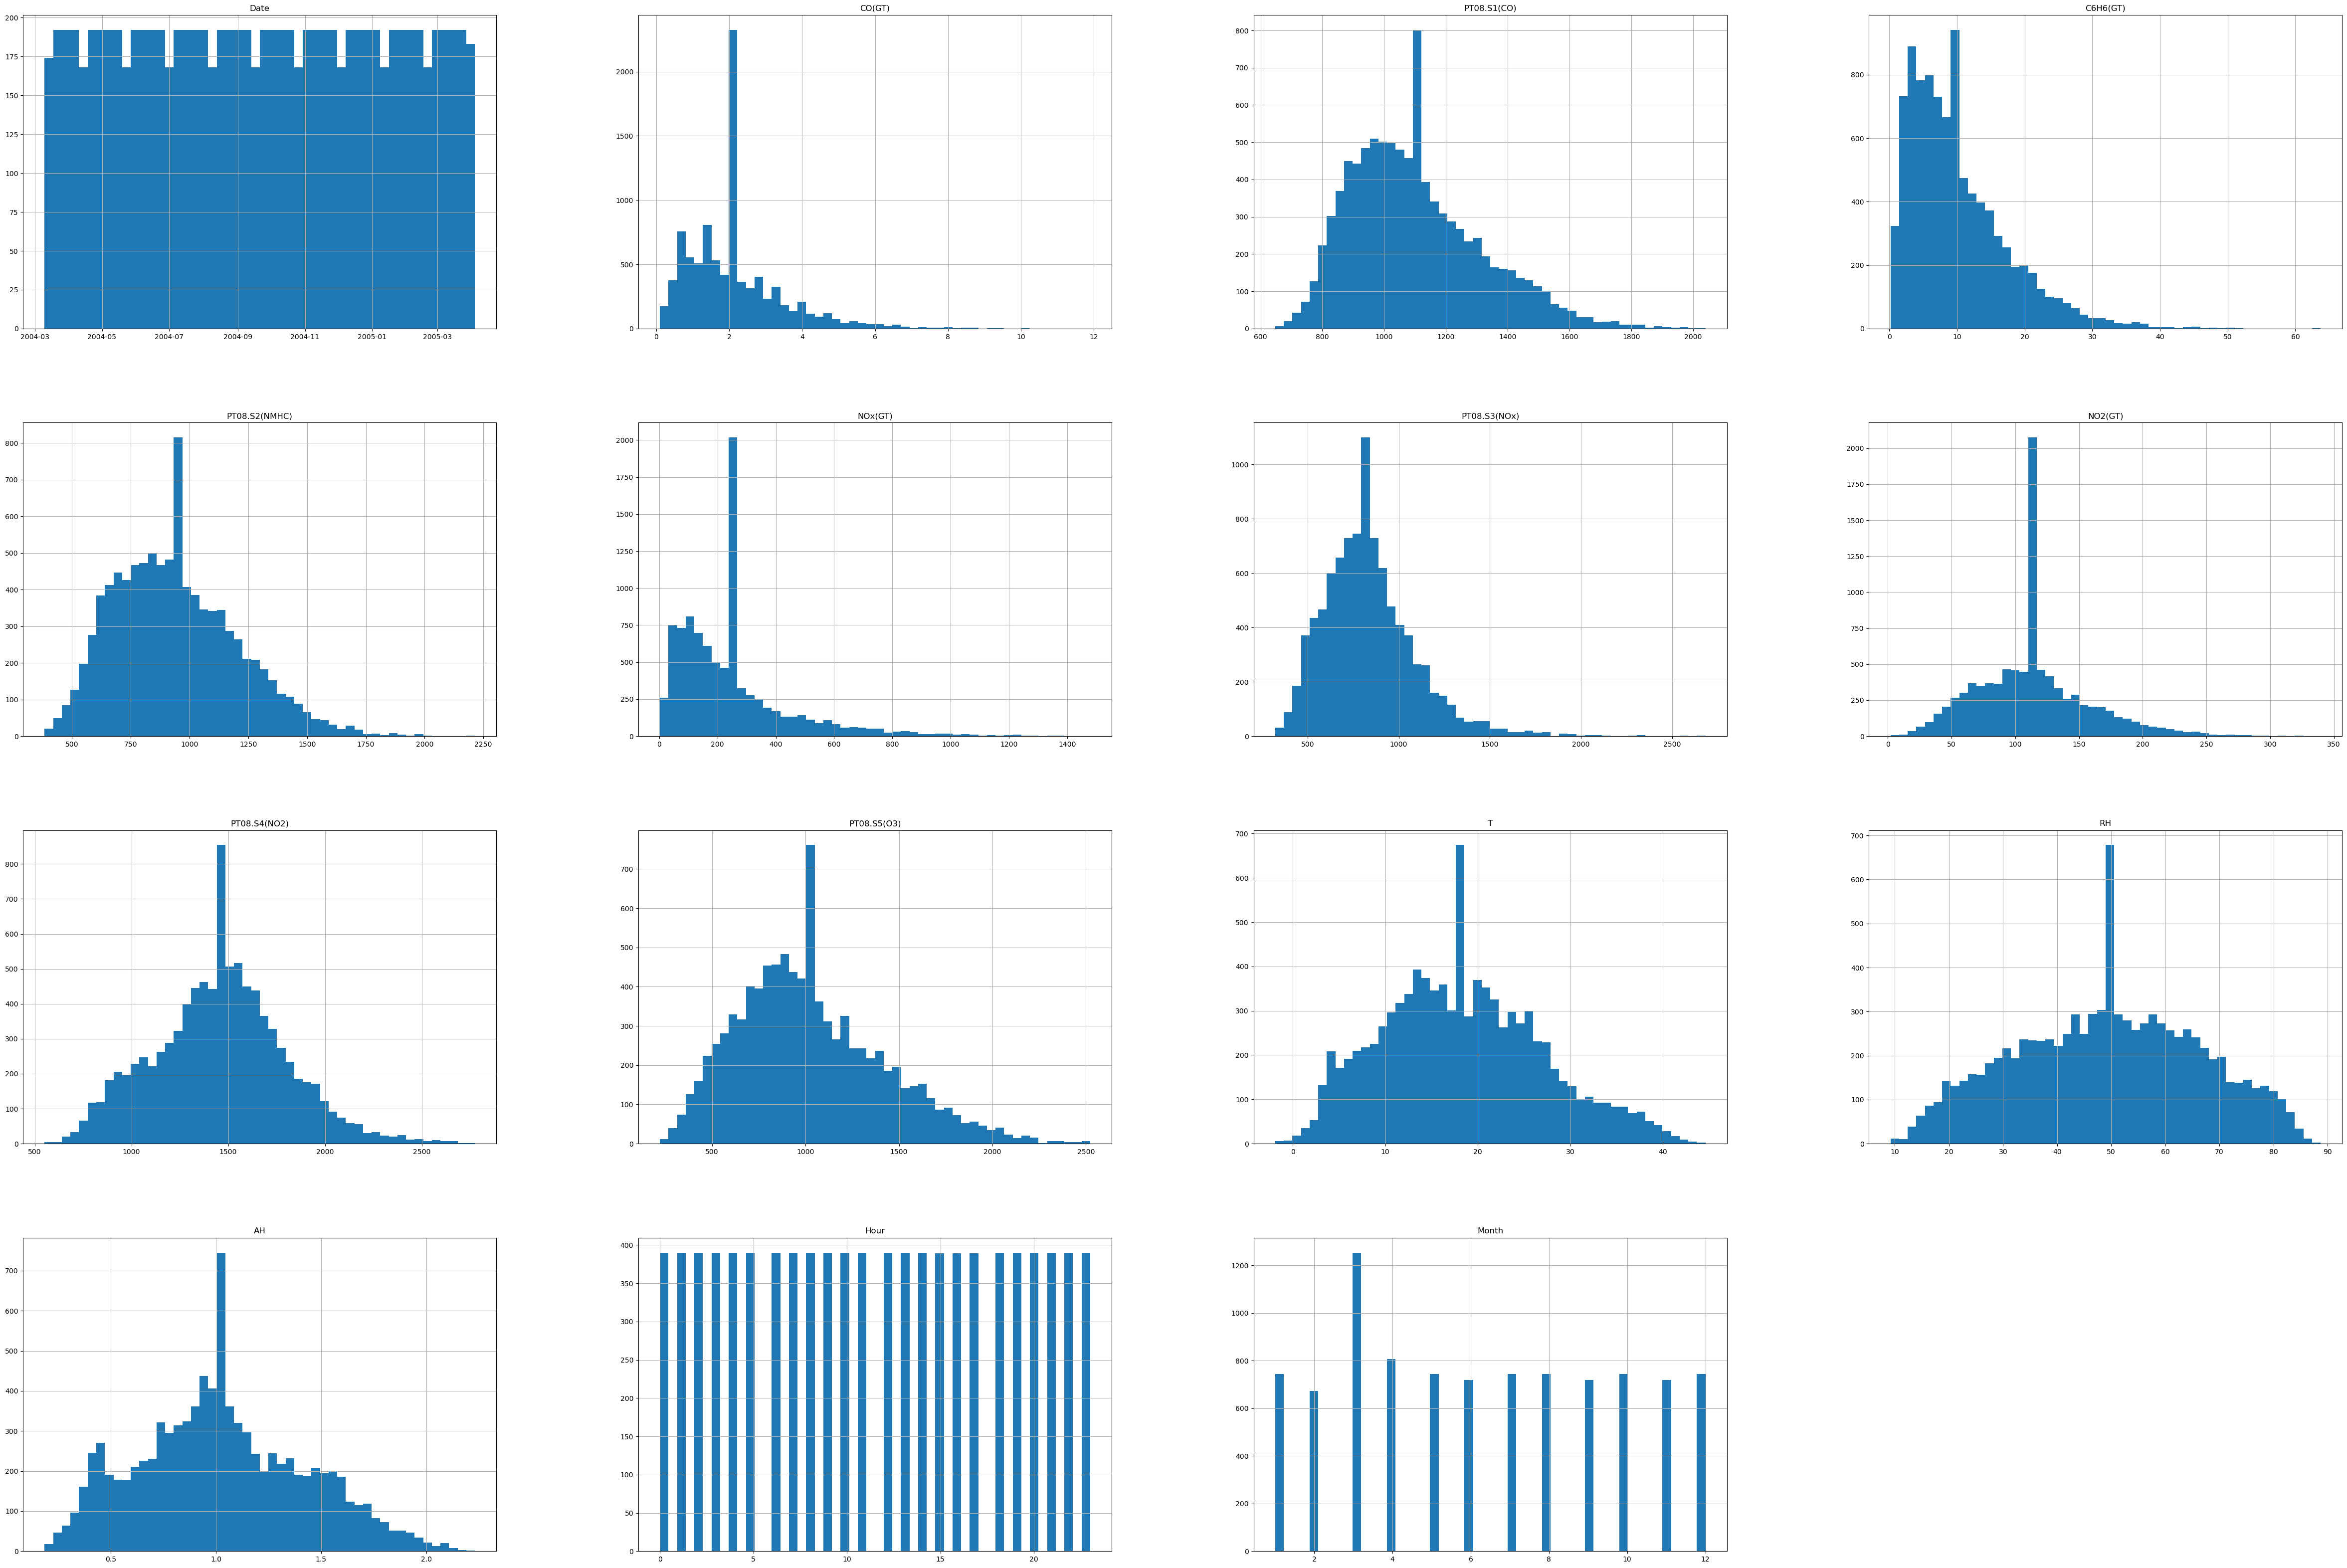

In [20]:
df.hist(bins=50, figsize=(60,40));       

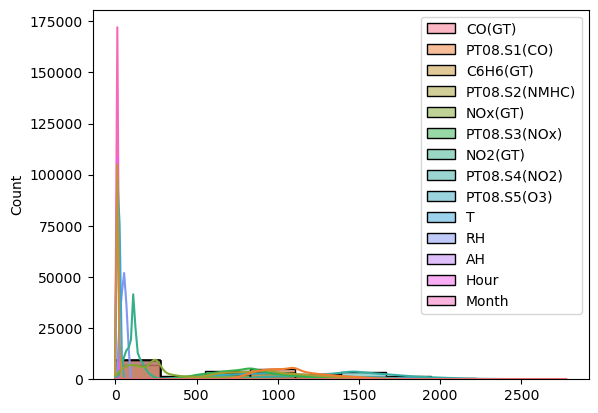

In [21]:
myplot=sb.histplot(df,kde=True,bins=10)

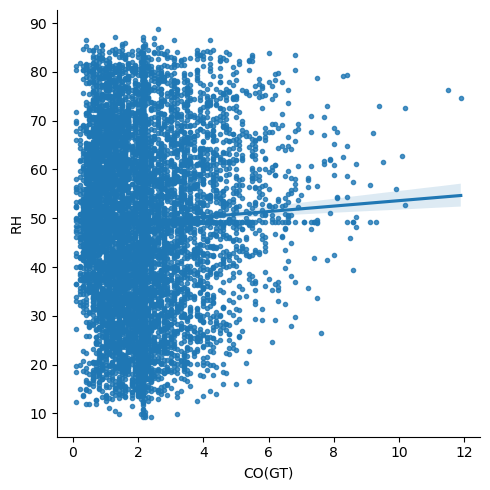

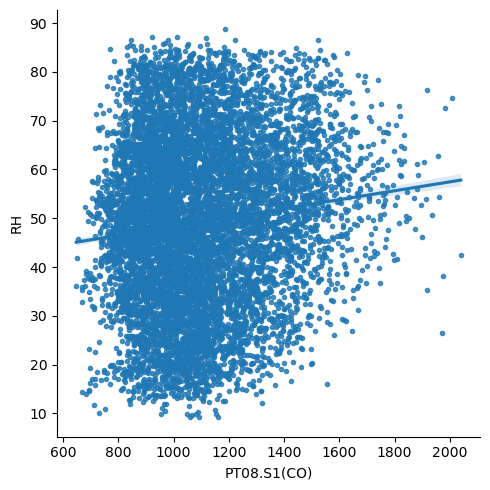

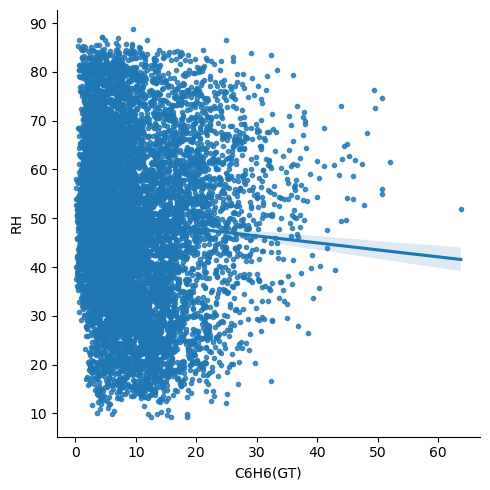

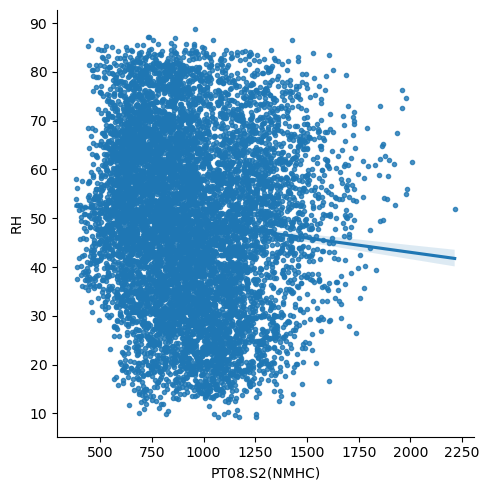

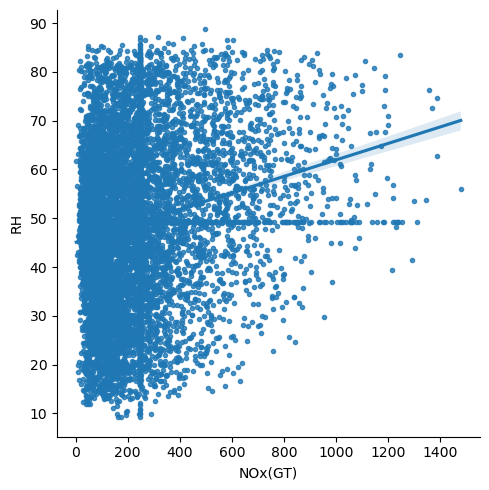

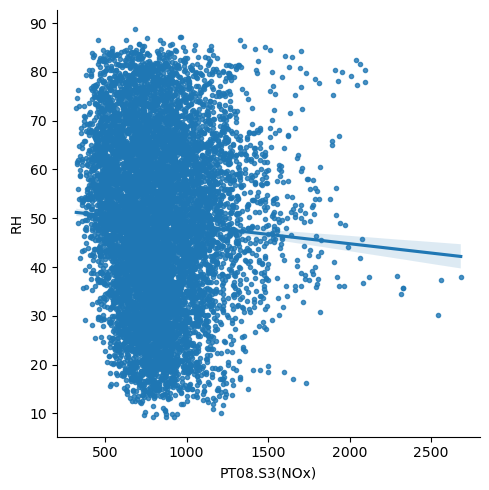

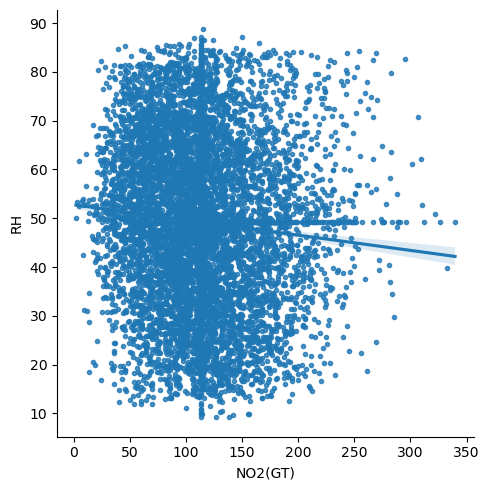

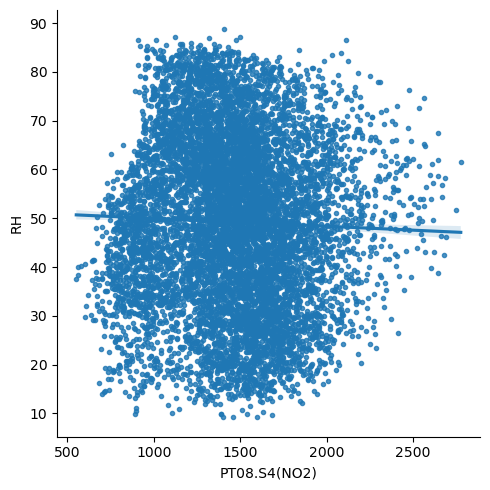

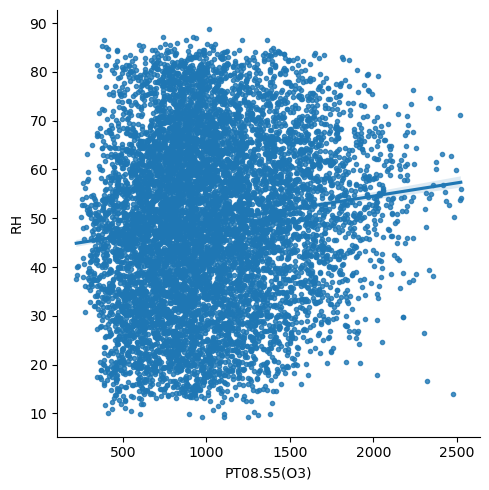

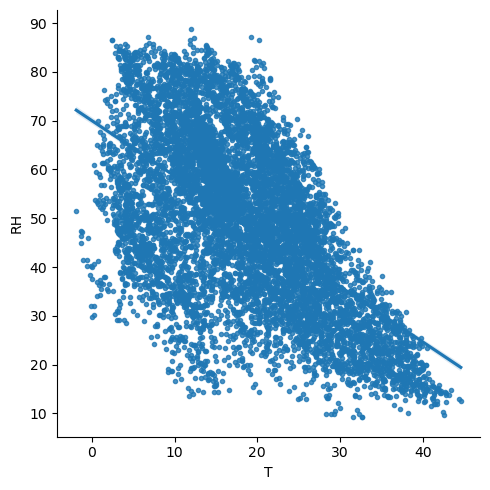

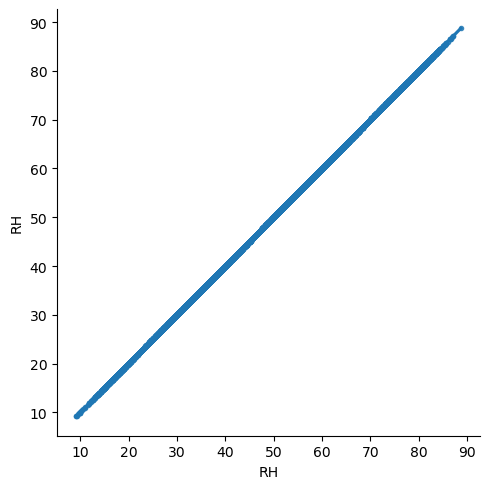

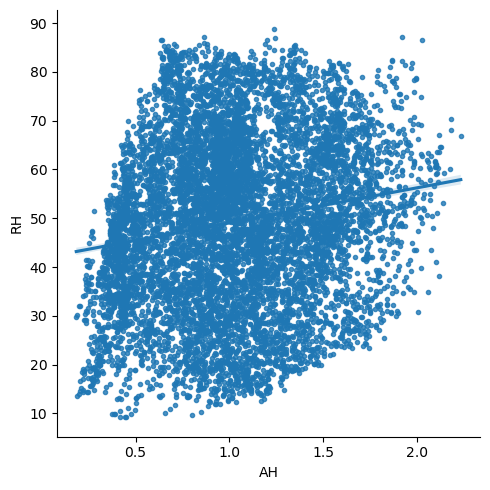

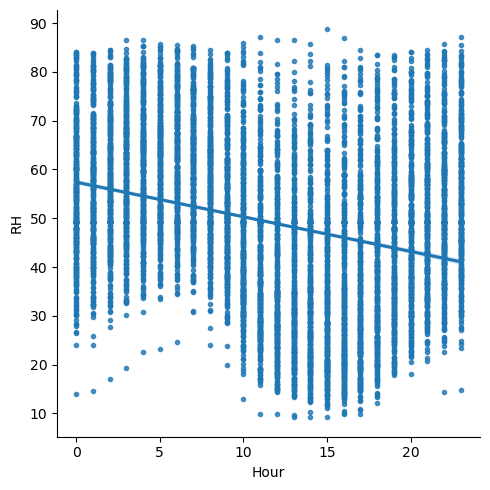

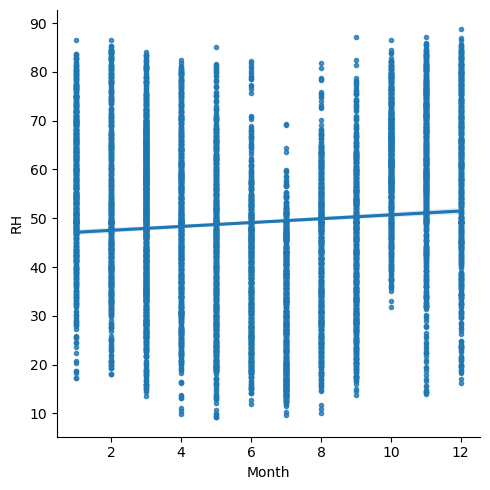

In [22]:
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sb.lmplot(x=i,y='RH',data=df,markers='.')

# Converting dataframe into numpy arrays and Normalization using sklearn

In [23]:
arr = df.to_numpy()

In [24]:
X = arr[:,2:14]
Y = arr[:,14]
z=arr[:,15].T 
for i in X:
    j=0;
    i=np.append(i,z[j])
    j+=1;


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1,train_size=0.9, random_state=42)

In [26]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Prediction and Error using Gradient descent method

# L1 -Regularization

In [27]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 1;
theta = np.zeros(13);

In [28]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45848888  0.40703281  0.3213837   0.56399777  0.015895   -0.46628464
  0.68598221  0.02280255 -0.1245483   0.55259189 -1.08033526 -0.28407059
  7.29570975]


In [29]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.504596597413446


In [30]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)    
print('predicted values of relative humidity using gradient descent method(L1-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L1-Regu):
 [ 6.94586397  5.292094   10.19414212 10.336263    7.79169241  3.98575561
  5.67143517  8.9465313   3.7493047   6.14947927  4.55166111  3.0803287
  2.78966848  7.57132157  8.58907805  9.10401729  3.1836711   7.39045126
  8.36915644  5.05576977  6.91993268 12.33275605 10.46470546  3.49336151
 11.62047692  7.08351864  3.88149714  9.63382242  8.74575743  6.76015564
 13.97575705  9.33120135  5.03065345  4.33267314  8.62291292 10.21400692
  4.10819015 10.6046898   8.51293239  6.86595289 11.77016068  2.15214244
  8.59940785 12.51149418  3.84136434  5.29989339  6.83053689 10.75595598
  8.90504261  6.68828442  9.7211009   2.16580002 11.51584336 11.68255929
  8.31199108  6.2671815   4.93075377  6.40420413 13.43541282  4.40657559
  7.21723733  8.67447639 11.39006673  9.83692272  1.92793709  3.29622355
 11.27657717  6.0210582   3.87293835  7.50251851  5.64005856  2.39427603
  7.08481157  4.96425371 11.13468318  9.161056

In [31]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.22515684652732


# L2 Regularization

In [32]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 2;
theta = np.zeros(13);

In [33]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45851606  0.40706358  0.32140995  0.56402711  0.01594068 -0.4661113
  0.68605044  0.02282373 -0.12451232  0.55267618 -1.08024504 -0.28401409
  7.29578504]


In [34]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.504339556216845


In [35]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)  
print('predicted values of relative humidity using gradient descent method(L1-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L1-Regu):
 [ 6.94580183  5.29204816 10.19437965 10.33623306  7.79157931  3.98595437
  5.67130207  8.94655153  3.74937518  6.14952884  4.55177577  3.08027861
  2.78981052  7.57138035  8.58892886  9.10402236  3.1835238   7.39055103
  8.36917453  5.05556467  6.91969696 12.33291559 10.46526189  3.49360665
 11.620653    7.08354534  3.8811891   9.63398534  8.74595773  6.76012696
 13.97617563  9.33131661  5.03071721  4.3328836   8.6231863  10.21431398
  4.10822483 10.60486449  8.5128874   6.86628803 11.77023462  2.1527858
  8.59955502 12.51195262  3.84122133  5.30002167  6.83062628 10.75603301
  8.90504343  6.68810546  9.72134633  2.16598255 11.51584413 11.68284849
  8.31208612  6.26735277  4.93047042  6.40421531 13.4358215   4.40659444
  7.21731829  8.6745013  11.39033263  9.83712781  1.9281157   3.2960341
 11.27661214  6.02119431  3.87290548  7.50254426  5.64000263  2.39430048
  7.08492853  4.96435881 11.13481975  9.1611219

In [36]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.224920794069426


# L3 Regularization

In [37]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 3;
theta = np.zeros(13);

In [38]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45848888  0.40703281  0.3213837   0.56399777  0.015895   -0.46628464
  0.68598221  0.02280255 -0.1245483   0.55259189 -1.08033526 -0.28407059
  7.29570975]


In [39]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.504596597413446


In [40]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)  
print('predicted values of relative humidity using gradient descent method(L3-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L3-Regu):
 [ 6.94586397  5.292094   10.19414212 10.336263    7.79169241  3.98575561
  5.67143517  8.9465313   3.7493047   6.14947927  4.55166111  3.0803287
  2.78966848  7.57132157  8.58907805  9.10401729  3.1836711   7.39045126
  8.36915644  5.05576977  6.91993268 12.33275605 10.46470546  3.49336151
 11.62047692  7.08351864  3.88149714  9.63382242  8.74575743  6.76015564
 13.97575705  9.33120135  5.03065345  4.33267314  8.62291292 10.21400692
  4.10819015 10.6046898   8.51293239  6.86595289 11.77016068  2.15214244
  8.59940785 12.51149418  3.84136434  5.29989339  6.83053689 10.75595598
  8.90504261  6.68828442  9.7211009   2.16580002 11.51584336 11.68255929
  8.31199108  6.2671815   4.93075377  6.40420413 13.43541282  4.40657559
  7.21723733  8.67447639 11.39006673  9.83692272  1.92793709  3.29622355
 11.27657717  6.0210582   3.87293835  7.50251851  5.64005856  2.39427603
  7.08481157  4.96425371 11.13468318  9.161056

In [41]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.22515684652732


# Predictions and Error analysis using Normal Equations method

In [42]:
th=FitNormal(X_train,Y_train)      
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(th*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))

print('Train set error: ',J_train)

Train set error:  16.141259295475198


In [43]:
Y_pred = []
for i in x:
    a1 = th*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred) 
print('predicted values of relative humidity using normal eqns method:\n', Y_pred)

predicted values of relative humidity using normal eqns method:
 [10.48719921  8.23356532 16.20655943 16.07344661 12.95638498 10.06408269
 10.69834322 15.34887713  8.64109978 10.22149115 10.48566861  5.78442779
  5.24127582 12.65501451 12.73290351 14.05568233  7.1179956  10.48297929
 14.20694149 10.10049033 12.21317653 15.2473319  12.34954343  5.07397567
 15.08582238 12.02880213  8.20539922 14.5597323  14.6220941   7.87216271
 12.95520084 13.18495602  9.47296078 12.03601187 12.16852556 11.96720462
 10.65773794 11.43191238 13.33592549 12.87190909 13.29037424 11.362391
 12.21103394 17.42557668  5.20176815  8.56956889  8.24962274 11.89655658
 16.33908428 12.00484471 14.64384937  1.94037782 18.71775737 17.08354648
 13.52104189 12.44672818  7.09065495 12.10398273 17.86814497  7.50533603
 12.23415542 18.66399966 13.75768963 17.37862051  2.41550684  6.10411198
 18.98071391  9.34344495  4.21196841 10.55182546  7.8195041   3.52379476
 12.18443996  8.95784129 12.47052231 14.27402057 18.69612992 

In [44]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 15.37258760399112


# Locally Weighted Regression

In [47]:
iterations=100
tau=100
Y_pred=LocallyWeighted(X_train,Y_train,x,tau,iterations)
Y_pred=np.array(Y_pred)
print(Y_pred)

[10.53347975  8.22694646 16.46595559 16.30874289 13.62691196 10.41548948
 10.88846567 15.70741181  8.81929707 10.44663904 10.66891042  5.58820807
  4.87572327 13.140435   13.28517483 14.03868733  6.53309091 10.80598798
 14.73071824 10.0902458  12.5546196  14.41854405 10.60077289  4.72103566
 14.54725833 12.16410007  7.46751338 15.11453129 14.63677073  7.83371687
 10.4685106  13.21681637  9.80687967 12.60962764 11.6926659  11.26587936
 11.00855017 10.79281128 13.17695514 13.32460518 12.71302839 12.82196155
 12.51989924 15.71125156  4.85476937  8.86596422  8.50366479 11.77987069
 17.02295878 12.55451787 14.14756571  1.64857585 19.01356868 17.35799765
 13.36356714 12.8550266   6.65151417 12.47913633 17.6249241   7.39415017
 12.28760914 19.64911659 13.71492515 17.1153355   1.57113406  5.44434964
 19.03556319  9.7439547   3.60736205  9.76062095  7.34359193  3.00561009
 12.46684233  9.4183343  11.45583173 14.35001141 19.35312242 15.78967048
 14.29808372 18.3015041  13.8568674   6.91572644  9

In [48]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 15.86084283413985


# Conclusion: Among all method,Normal eqn method gives the best fit and predict Relative humidity more accurately.